#             ***SENTIMENT ANALYSIS ON MOVIE REVIEWS***

**ABOUT DATASET**

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets providing a set of 25,000 highly polar movie reviews for training and 25,000 for testing. In this dataset Predict the number of positive and negative reviews using classification.

***IMPORT NECESSARY LIBRARIES***

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import plotly.express as px
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words= set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/IMDB Dataset.csv',encoding='ISO-8859-1')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


***UNDERSTAND THE STRUCTURE OF DATAFRAME***

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df.dtypes

review       object
sentiment    object
dtype: object

***DATA VISUALIZATION***

In [ ]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

***Understanding the Distribution of Sentiment Using CountPlot***

<ipython-input-5-bea539dba4df>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment',data=df,palette='viridis')


Text(0.5, 1.0, 'SENTIMENT DISTRIBUTION')

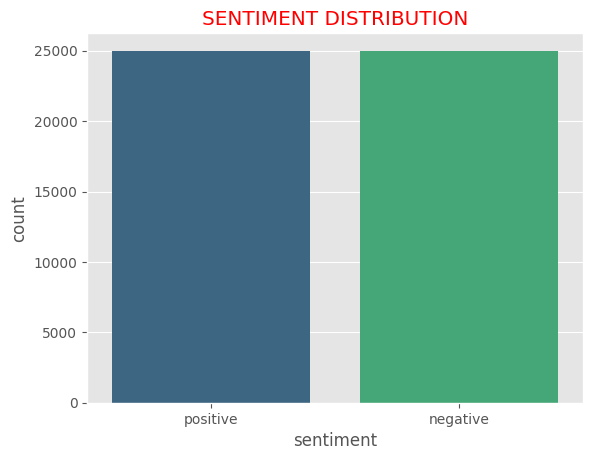

In [ ]:
sns.countplot(x='sentiment',data=df,palette='viridis')
plt.title("SENTIMENT DISTRIBUTION",color='red')

>>"The countplot reveals an equal distribution of positive and negative sentiments in the dataset. This balanced distribution suggests that the dataset is well-represented across both sentiment categories"

***Reviews and their Corresponding Sentiments Analysis***

In [ ]:
for i in range(5):
  print("Review",[i])
  print(df['review'].iloc[i],"\n")
  print("Sentiment",df['sentiment'].iloc[i],"\n\n")

Review [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due

***Number of Words in each Review***




In [ ]:
def no_of_words(text):
  words=text.split()
  word_count= len(words)
  return word_count


In [ ]:
df['word count'] =df['review'].apply(no_of_words)

In [ ]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


***Histogram Comparison of Word Counts for Positive and Negative Sentiments***

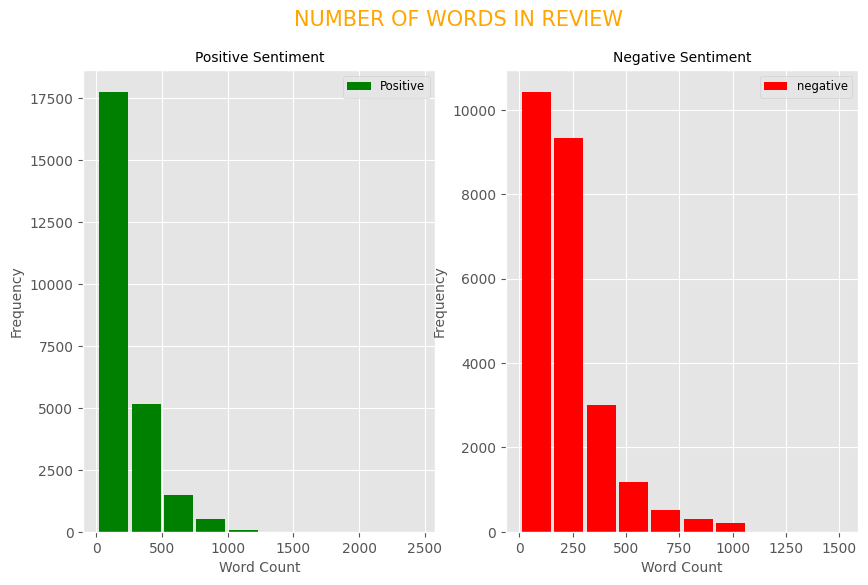

In [ ]:
fig, ax=plt.subplots(1,2,figsize=(10,6))

# Plot histogram for Positive sentiments
ax[0].hist(df[df['sentiment']=='positive']['word count'],label='Positive',color='green',rwidth=0.9)
ax[0].legend(loc='upper right',fontsize='small')
ax[0].set_title('Positive Sentiment',fontsize=10)
ax[0].set_xlabel('Word Count',fontsize=10)
ax[0].set_ylabel('Frequency',fontsize=10)

# Plot histogram for Negative sentiments
ax[1].hist(df[df['sentiment']=='negative']['word count'],label='negative',color='red',rwidth=0.9)
ax[1].legend(loc='upper right',fontsize='small')
ax[1].set_title('Negative Sentiment',fontsize=10)
ax[1].set_xlabel('Word Count',fontsize=10)
ax[1].set_ylabel('Frequency',fontsize=10)

fig.suptitle("NUMBER OF WORDS IN REVIEW",color='orange',fontsize=15)
plt.show()

>>"The histograms help in understanding how the length of reviews varies with sentiment. By analyzing these distributions, WE can gain insights into how review length might relate to the sentiment expressed and whether different sentiments tend to be expressed in more or fewer words."






>>

***Replace Sentiment Labels with Numerical Values***

In [ ]:
df.sentiment.replace("positive",1,inplace=True)
df.sentiment.replace("negative",0,inplace=True)
df

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230
...,...,...,...
49995,I thought this movie did a down right good job...,1,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,112
49997,I am a Catholic taught in parochial elementary...,0,230
49998,I'm going to have to disagree with the previou...,0,212


***TEXT PREPROCESSING***

In [ ]:
def data_processing(text):
  text = text.lower()
  text = re.sub('<br />', '',text)
  text = re.sub(r"https\S+|www\S+|https\S+",'',text,flags = re.MULTILINE)
  text = re.sub(r'\@w+|\#','',text)
  text = re.sub(r'[^\w\s]','',text)
  text_tokens = word_tokenize(text)
  filtered_text = [i for i in text_tokens if i not in stop_words]
  return " ".join(filtered_text)

In [ ]:
df.review = df['review'].apply(data_processing)

***Number of Duplicates Entries***

In [ ]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries:", duplicated_count)

Number of duplicate entries: 421


***Remove Duplicate Rows***

In [ ]:
df =df.drop_duplicates('review')

***Stemming***

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
  text = [stemmer.stem(word) for word in data]
  return data

In [ ]:
df.review = df['review'].apply(lambda x:stemming(x))

***Compute the Word Count for Each Review and Add it as a New Column***

In [ ]:
df['word count'] =df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125


***Filtering Positive Reviews***

In [ ]:
positive_reviews = df[df.sentiment == 1]
positive_reviews.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


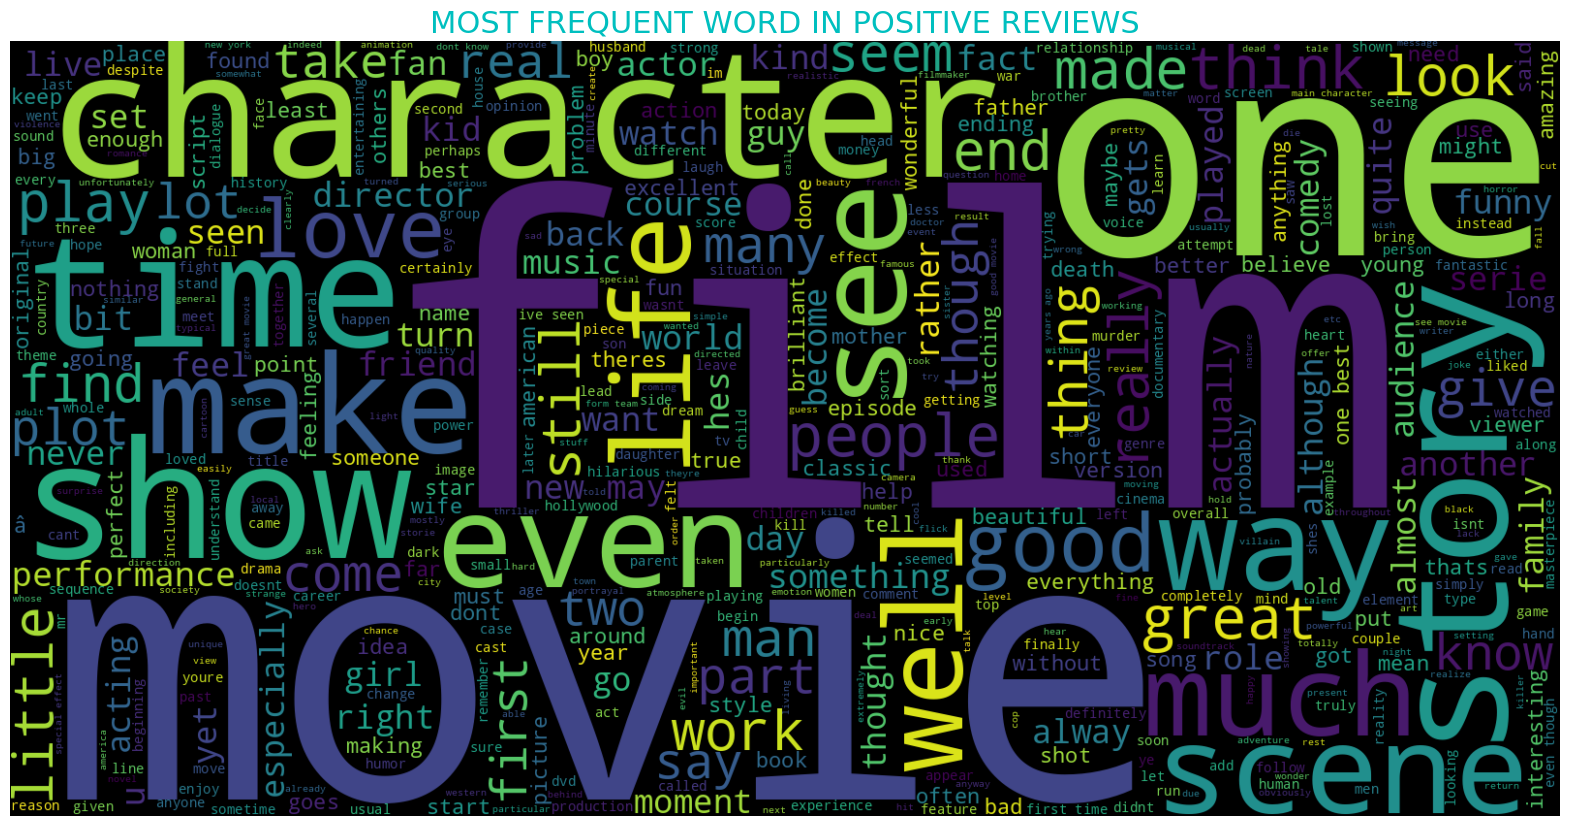

In [ ]:
text = ' '.join([word for word in positive_reviews['review']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("MOST FREQUENT WORD IN POSITIVE REVIEWS",fontsize=22,color='c')
plt.show()

***Top 15 Most Frequent Words in Positive Reviews***

In [ ]:
from collections import Counter
count = Counter()
for text in positive_reviews['review'].values:
  for word in text.split():
    count[word] +=1
count.most_common(15)

[('film', 39279),
 ('movie', 35827),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12335),
 ('see', 11813),
 ('time', 11723),
 ('well', 10924),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

***Creates a DataFrame from the most Common Words and their Counts***

In [ ]:
positive_words = pd.DataFrame(count.most_common(15))
positive_words.columns =['word','count']
positive_words.head()

,word,count
0,film,39279
1,movie,35827
2,one,25621
3,like,16998
4,good,14281


***Visualization of Leading Terms in Positive Feedback***

In [ ]:
px.bar(positive_words,x='count',y='word',title='COMMOM WORDS IN POSITIVE REVIEWS',color = 'word')

***Filtering Negative Reviews***

In [ ]:
negative_reviews = df[df.sentiment == 0]
negative_reviews.head()

,review,sentiment,word count
3,basically theres family little boy jake thinks...,0,67
7,show amazing fresh innovative idea 70s first a...,0,83
8,encouraged positive comments film looking forw...,0,64
10,phil alien one quirky films humour based aroun...,0,51
11,saw movie 12 came recall scariest scene big bi...,0,84


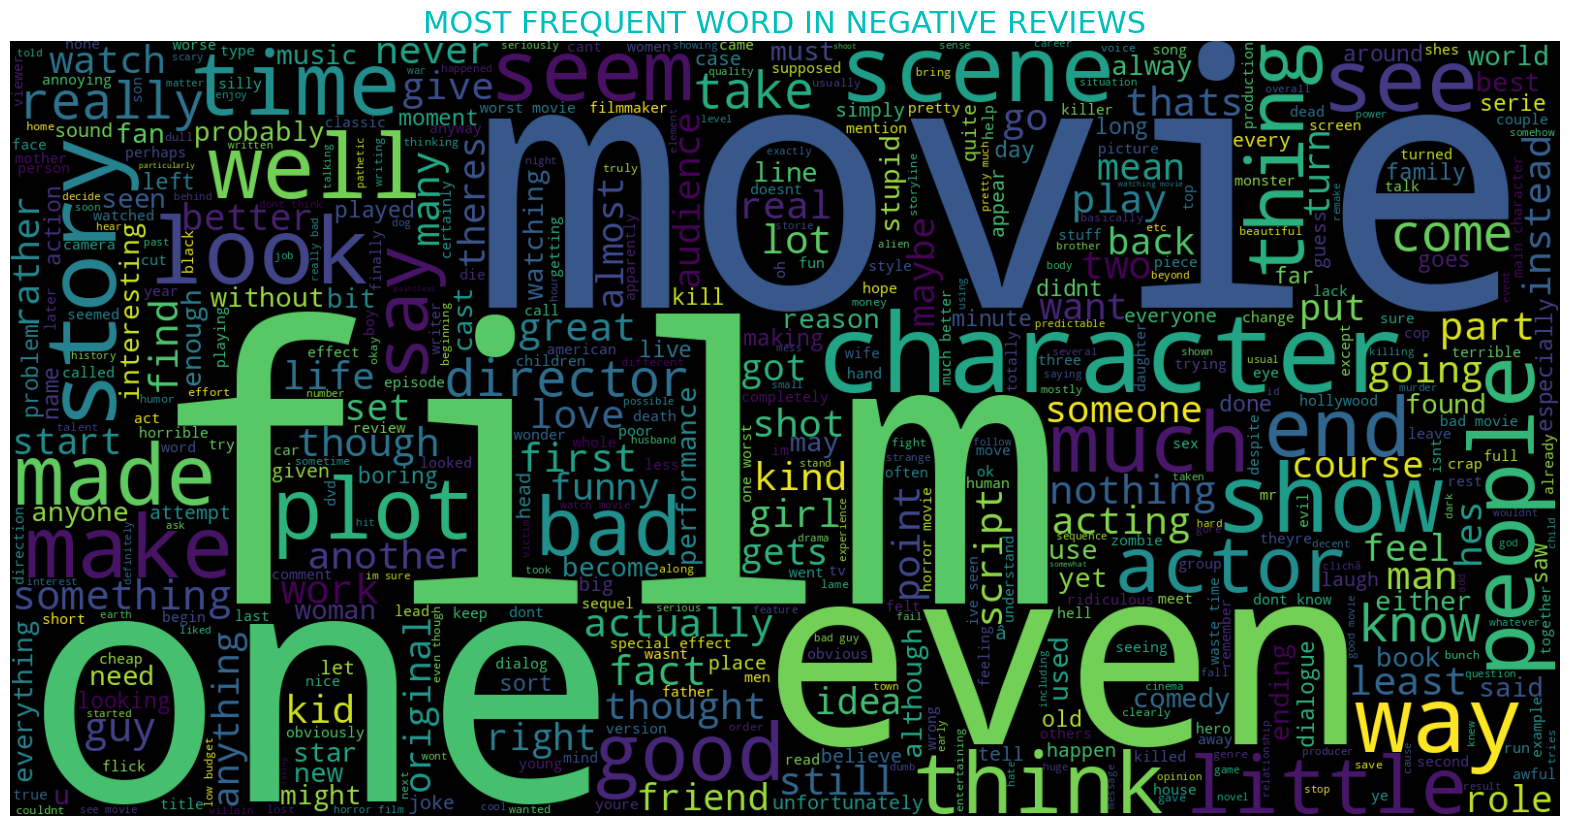

In [ ]:
text = ' '.join([word for word in negative_reviews['review']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("MOST FREQUENT WORD IN NEGATIVE REVIEWS",fontsize=22,color='c')
plt.show()

***Top 15 Most Frequent Words in Negative Reviews***

In [ ]:
from collections import Counter
count = Counter()
for text in negative_reviews['review'].values:
  for word in text.split():
    count[word] +=1
count.most_common(15)

[('movie', 46992),
 ('film', 34648),
 ('one', 24356),
 ('like', 21506),
 ('even', 14758),
 ('good', 13994),
 ('bad', 13900),
 ('would', 13482),
 ('really', 12083),
 ('time', 11343),
 ('see', 10411),
 ('dont', 9889),
 ('get', 9881),
 ('much', 9758),
 ('story', 9561)]

***Creates a DataFrame from the most Common Words and their Counts***

In [ ]:
negative_words = pd.DataFrame(count.most_common(15))
negative_words.columns =['word','count']
negative_words.head()

,word,count
0,movie,46992
1,film,34648
2,one,24356
3,like,21506
4,even,14758


***Visualization of Leading Terms in Negative Feedback***

In [ ]:
px.bar(negative_words,x='count',y='word',title='COMMOM WORDS IN NEGATIVE REVIEWS',color = 'word')



***COLLECTING X AND Y***

In [ ]:
x = df['review']
y = df['sentiment']


***Feature Extraction Using TF-IDF for Review Data***

In [ ]:
vector = TfidfVectorizer()
x = vector.fit_transform(df['review'])


***Spliting Data into Training and Testing***

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=.30,random_state=42)

In [ ]:
print("Size of x_train",(x_train.shape))
print("Size of y_train",(y_train.shape))
print("Size of x_test",(x_test.shape))
print("Size of y_test",(y_test.shape))

Size of x_train (34704, 223396)
Size of y_train (34704,)
Size of x_test (14874, 223396)
Size of y_test (14874,)



***MODEL CREATION USING ALGORITHMS***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

***LogisticRegression***

In [ ]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
lg_predict =lg.predict(x_test)
lg_acc = accuracy_score(lg_predict,y_test)
print("Test accuracy of LogisticRegression model is :{:2f}%".format(lg_acc*100))

Test accuracy of LogisticRegression model is :89.021111%


In [ ]:
print(confusion_matrix(y_test,lg_predict))
print("*"*1000)
print(classification_report(y_test,lg_predict))

[[6453  908]
 [ 725 6788]]
*************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

***Naive Bayes***

In [ ]:
model = MultinomialNB()
model.fit(x_train,y_train)
model_predict =model.predict(x_test)
model_acc = accuracy_score(model_predict,y_test)
print("Test accuracy of naive bayes model is:{:2f}%".format(model_acc*100))

Test accuracy of naive bayes model is:86.439424%


In [ ]:
print(confusion_matrix(y_test,model_predict))
print("*"*1000)
print(classification_report(y_test,model_predict))

[[6421  940]
 [1077 6436]]
*************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

***Decision Tree Classifier***

In [ ]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train,y_train)
tree_predict =tree.predict(x_test)
tree_acc = accuracy_score(tree_predict,y_test)
print("Test accuracy of DecisionTreeClassifier model is:{:2f}%".format(tree_acc*100))

Test accuracy of DecisionTreeClassifier model is:71.379589%


In [ ]:
print(confusion_matrix(y_test,tree_predict))
print("*"*1000)
print(classification_report(y_test,tree_predict))

[[5265 2096]
 [2161 5352]]
*************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

***Random Forest Classifier***

In [ ]:
Random = RandomForestClassifier(n_estimators=100, random_state=42)
Random.fit(x_train,y_train)
Random_predict =Random.predict(x_test)
Random_acc = accuracy_score(Random_predict,y_test)
print("Test accuracy of RandomForestClassifier model is:{:2f}%".format(Random_acc*100))

Test accuracy of RandomForestClassifier model is:84.987226%


In [ ]:
print(confusion_matrix(y_test,Random_predict))
print("*"*1000)
print(classification_report(y_test,Random_predict))

[[6280 1081]
 [1152 6361]]
*************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

***XGBClassifier***

In [ ]:
boot = XGBClassifier()
boot.fit(x_train,y_train)
boot_predict =boot.predict(x_test)
boot_acc = accuracy_score(boot_predict,y_test)
print("Test accuracy of XGBClassifier model is:{:2f}%".format(boot_acc*100))

Test accuracy of XGBClassifier model is:85.444400%


In [ ]:
print(confusion_matrix(y_test,boot_predict))
print("*"*1000)
print(classification_report(y_test,boot_predict))

[[6114 1247]
 [ 918 6595]]
*************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

***MODEL ACCURACY COMPARISON***

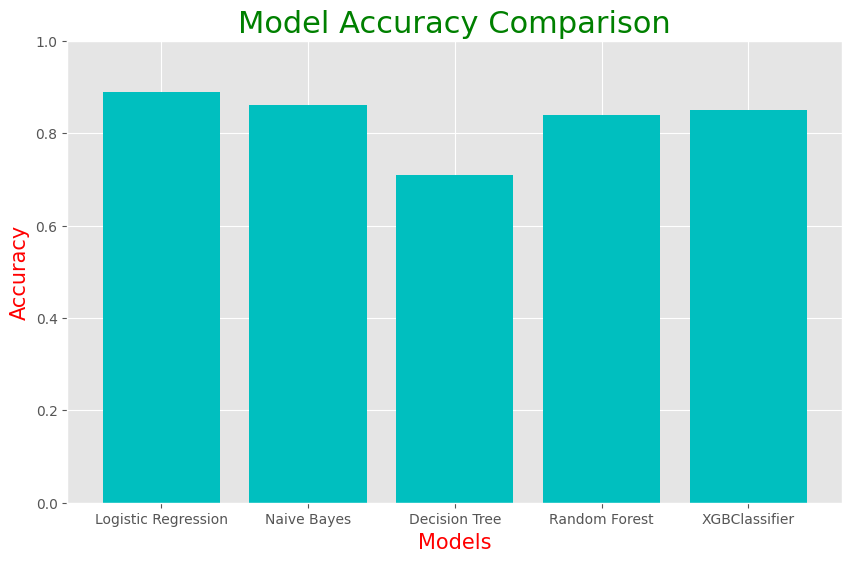

In [3]:
models = ['Logistic Regression','Naive Bayes','Decision Tree','Random Forest','XGBClassifier']
accuracies = [0.89, 0.86, 0.71, 0.84,0.85]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='c')

plt.xlabel('Models',color='red',fontsize=15)
plt.ylabel('Accuracy',color='red',fontsize=15)
plt.title('Model Accuracy Comparison',color='green',fontsize=22)
plt.ylim([0, 1])

plt.show()

***SUMMARY OF SENTIMENT ANALYSIS OF MOVIE REVIEWS***







Sentiment analysis on movie reviews that results in a balanced mix of positive and negative sentiment indicates that the film elicited a range of emotional responses from viewers. This suggests that while some audience members found aspects of the movie enjoyable or impressive, others had criticisms or dissatisfaction. The mixed sentiment reflects diverse opinions and highlights both strengths and weaknesses perceived by different viewers.